## IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
movies=pd.read_csv('tmdb_movies_data.csv')

## DATA CLEANING

In [3]:
movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

In [4]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#since the dataset contain null values also 
#count total rows in each column which contain null values

movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
movies.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [8]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(movies.duplicated())

1

In [9]:
movies.drop_duplicates(inplace = True)

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date          10

In [11]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [12]:
movies.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

## DATA EXPLORATION

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


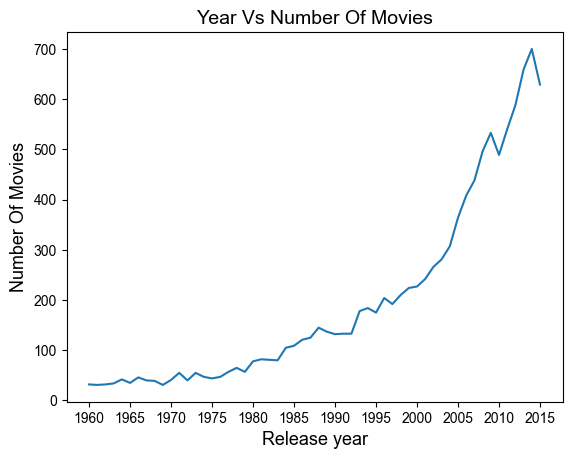

In [13]:
# make group for each year and count the number of movies in each year 
data=movies.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
movies.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

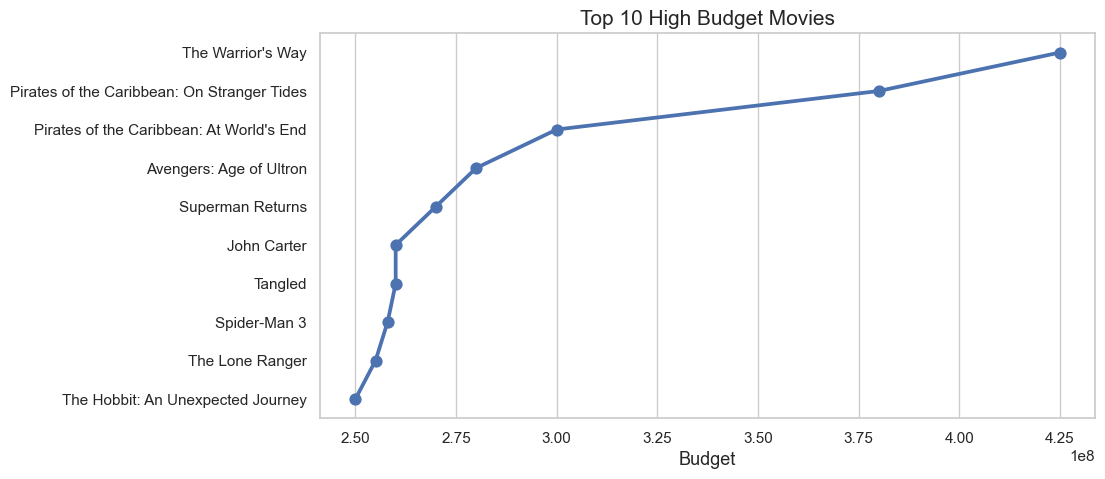

In [14]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movies['budget'].sort_values(ascending = False))
info['original_title'] = movies['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

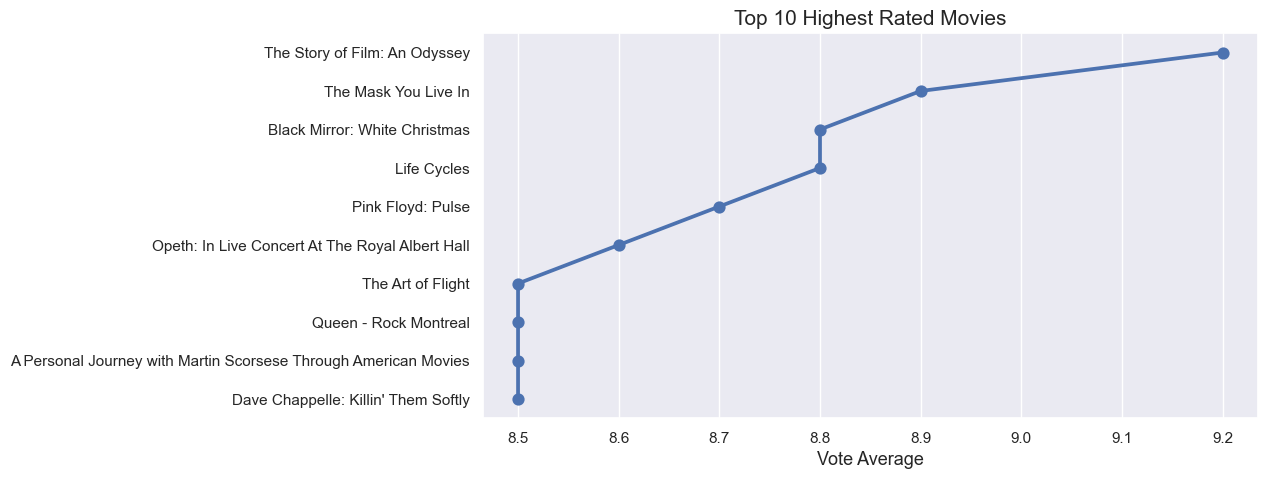

In [15]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movies['vote_average'].sort_values(ascending = False))
info['original_title'] = movies['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

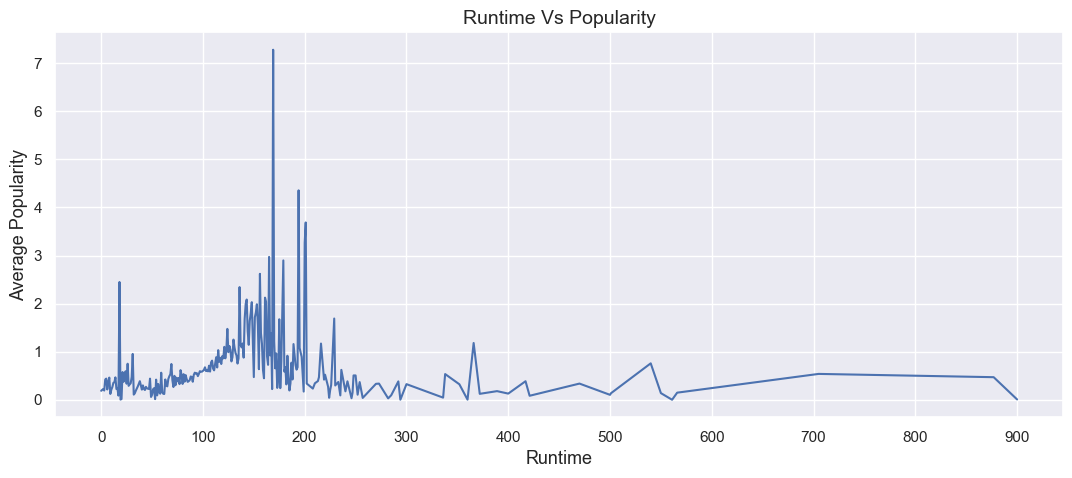

In [16]:
#use groupby function and group the data according to their runtime.
#make a plot using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
movies.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

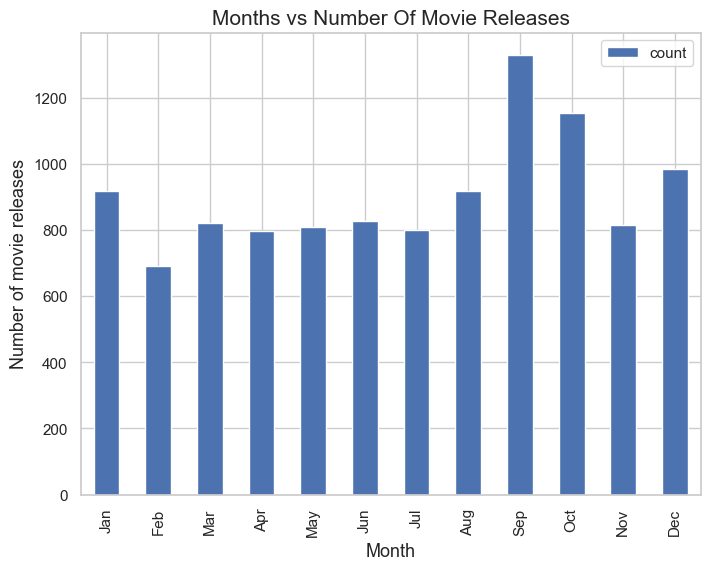

In [17]:
#extract the month number from the release date.
month_release = movies['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

In [24]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = movies[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')

/var/folders/ww/h3r9s2j93ylbk0pdctkmhyzm0000gq/T/ipykernel_59460/1367201238.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  genre_count.append([genre, total_genre_movies[i]])


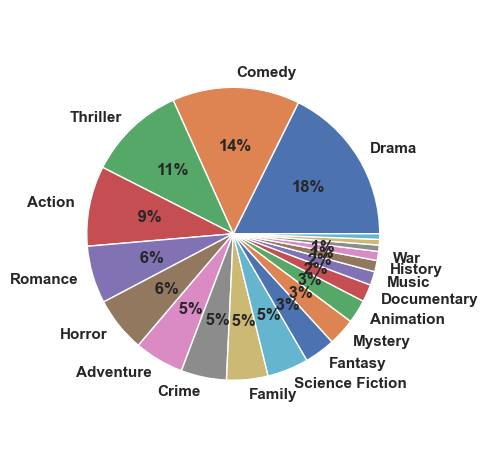

In [25]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

In [26]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

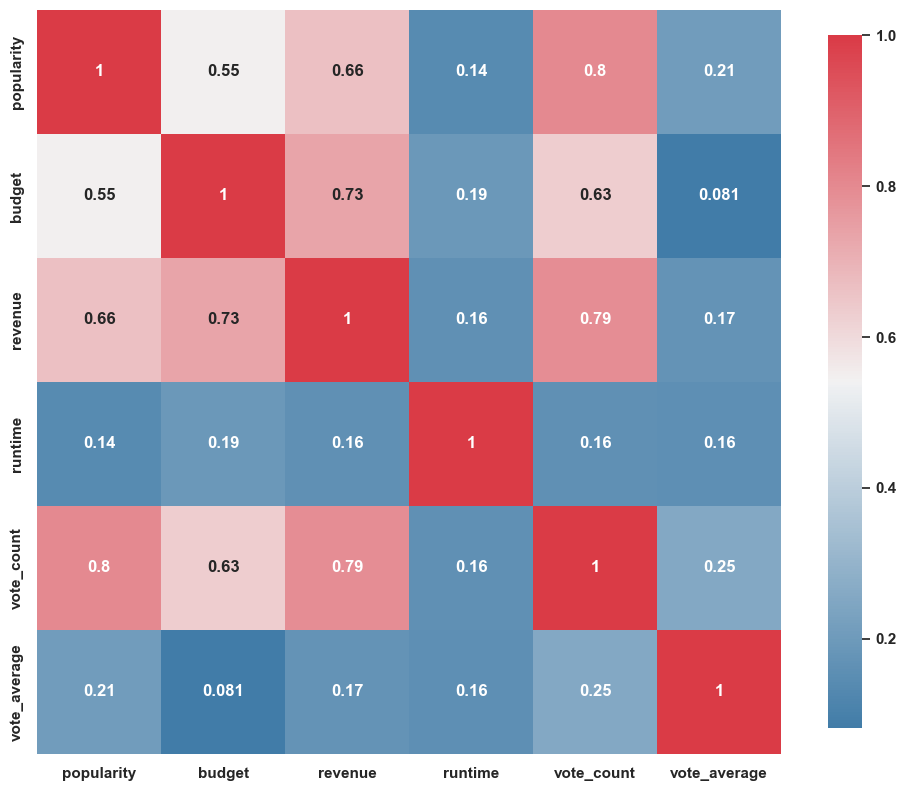

In [27]:
plot_correlation_map(movies[['popularity','budget','revenue','runtime','vote_count','vote_average']])

## FEATURE SELECTION

In [28]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [29]:
movies=movies[['id', 'original_title', 'overview', 'genres']]

In [30]:
movies

,id,original_title,overview,genres
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller
...,...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ...",Documentary
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...,Mystery|Comedy
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the...",Action|Comedy


In [31]:
movies['tags'] = movies['overview']+movies['genres']

/var/folders/ww/h3r9s2j93ylbk0pdctkmhyzm0000gq/T/ipykernel_59460/1127868038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['overview']+movies['genres']


In [32]:
movies

,id,original_title,overview,genres,tags
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Twenty-two years after the events of Jurassic ...
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,An apocalyptic story set in the furthest reach...
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Beatrice Prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Thirty years after defeating the Galactic Empi...
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ...",Documentary,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama,Grand Prix driver Pete Aron is fired by his te...
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...,Mystery|Comedy,An insurance agent who moonlights as a carthie...
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the...",Action|Comedy,"In comic Woody Allen's film debut, he took the..."


In [33]:
new_data  = movies.drop(columns=['overview', 'genres'])

In [34]:
new_data

,id,original_title,tags
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the..."


## MODEL BUILDING

In [35]:
cv=CountVectorizer(max_features=10000, stop_words='english')

In [36]:
cv

CountVectorizer(max_features=10000, stop_words='english')

In [37]:
vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [38]:
vector.shape

(10865, 10000)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
similarity=cosine_similarity(vector)

In [41]:
similarity

array([[1.        , 0.2057378 , 0.19802951, ..., 0.        , 0.0758098 ,
        0.        ],
       [0.2057378 , 1.        , 0.12222647, ..., 0.        , 0.16376789,
        0.        ],
       [0.19802951, 0.12222647, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.03573708,
        0.        ],
       [0.0758098 , 0.16376789, 0.        , ..., 0.03573708, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [42]:
new_data[new_data['original_title']=="The Godfather"].index[0]

7269

In [43]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(new_data.iloc[i[0]].original_title)

Insurgent
The Hunger Games: Mockingjay - Part 1
Mad Max
Atlas Shrugged Part I
The Covenant


In [44]:
def recommand(movies):
    index=new_data[new_data['original_title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].original_title)

In [45]:
recommand("Iron Man")

Taken
Harry Brown
The Transporter Refueled
Man on Fire
Landmine Goes Click


In [46]:
import pickle

In [47]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [48]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [49]:
pickle.load(open('movies_list.pkl', 'rb'))

,id,original_title,tags
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the..."
